In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import datasets 
from sklearn import preprocessing 
from sklearn import linear_model 
from sklearn import model_selection as ms 

In [5]:
cancer_data = datasets.load_breast_cancer()

# Training labels ("malignant = 0, benign = 1")
y = cancer_data.target 

# 30 attributes
X = cancer_data.data

# scale each data attribute to zero-mean and unit variance
X = preprocessing.scale(X) 

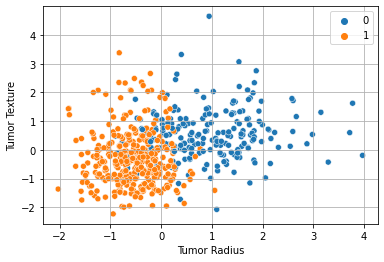

In [7]:
# Plot the first 2 attributes of training points 

sns.scatterplot(X[:, 0], X[:, 1], hue=y)
plt.xlabel("Tumor Radius")
plt.ylabel("Tumor Texture")
plt.grid(True)
plt.show()

In [10]:
# Range of hyperparameter values 1e-15 to 1 in increments of 0.005
alpha = np.arange(1e-15, 1, 0.005) 

# Initialize validation score for each alpha value 
val_scores = np.zeros((len(alpha), 1))

for i in range(len(alpha)):
    # Set up SVM with hinge loss and L2 norm regularization
    model = linear_model.SGDClassifier(loss="hinge", penalty="l2",                                              alpha=alpha[i])
    # Calculate cross validation scores for 5-fold cross validation
    score = ms.cross_val_score(model, X, y, cv=5)
    val_scores[i] = score.mean()

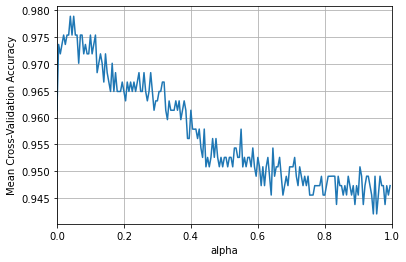

In [15]:
# Plot how cross-validation score changes with alpha
plt.plot(alpha, val_scores)
plt.xlim(0,1)
plt.xlabel("alpha")
plt.ylabel("Mean Cross-Validation Accuracy")
plt.grid(True)
plt.show()

alpha_star =  0.040000000000001


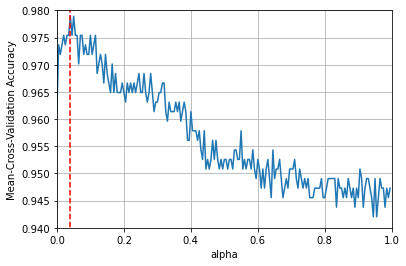

In [20]:
# Determine the alpha that maximizes the cross-validation score
ind = np.argmax(val_scores)
alpha_star = alpha[ind]
print("alpha_star = ", alpha_star)

plt.plot(alpha, val_scores)
plt.plot(np.ones(11)*alpha_star, np.arange(0,1.1,0.1), "--r")
plt.xlim(0,1)
plt.ylim(0.94, 0.98)
plt.xlabel("alpha")
plt.ylabel("Mean-Cross-Validation Accuracy")
plt.grid(True)
plt.show()

In [25]:
# Train model with alpha star
model_star = linear_model.SGDClassifier(loss="hinge", penalty="l2", 
                                        alpha=alpha_star)
                                        
model_trained = model_star.fit(X,y)
print("Training Accuracy = ", model_trained.score(X,y))

Training Accuracy =  0.9806678383128296


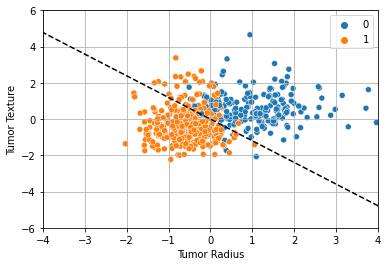

In [33]:
# Plot decision boundary of trained model 
slope = model_trained.coef_[0,1]/-model_trained.coef_[0,0]

x1 = np.arange(-10, 10, 0.5)
y1 = slope*x1
sns.scatterplot(X[:,0], X[:, 1], hue=y)
plt.plot(x1, y1, "--k")
plt.xlim(-4, 4)
plt.ylim(-6,6)
plt.xlabel("Tumor Radius")
plt.ylabel("Tumor Texture")
plt.grid(True)
plt.show()